# Milestone Project 1: Food Vision Big

## Check GPU

* A100![2024-01-31 (1).png](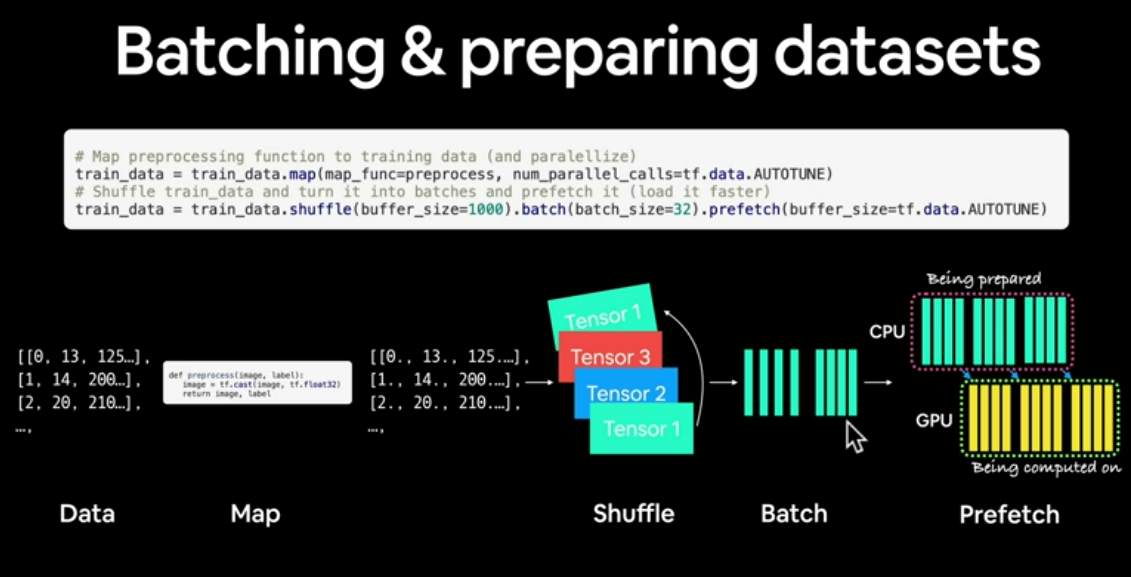![2024-01-31 (1).png](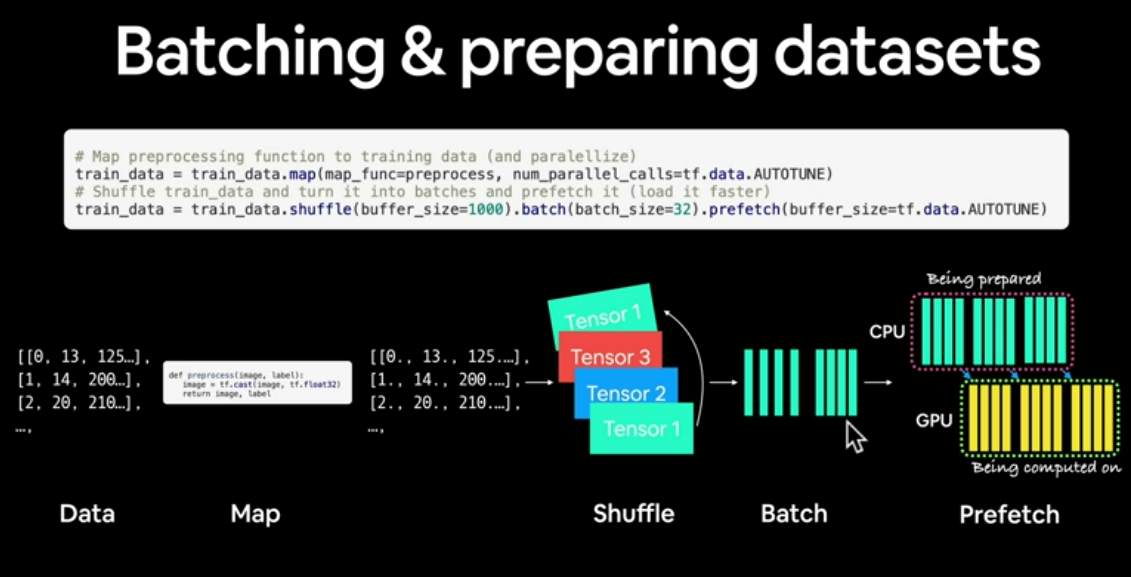![2024-01-31 (3).png](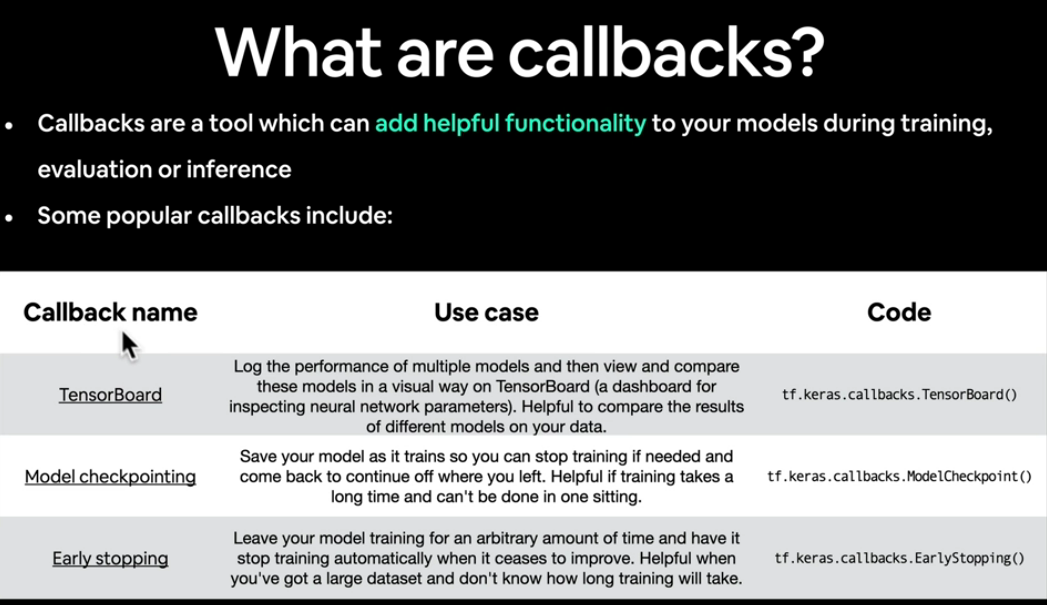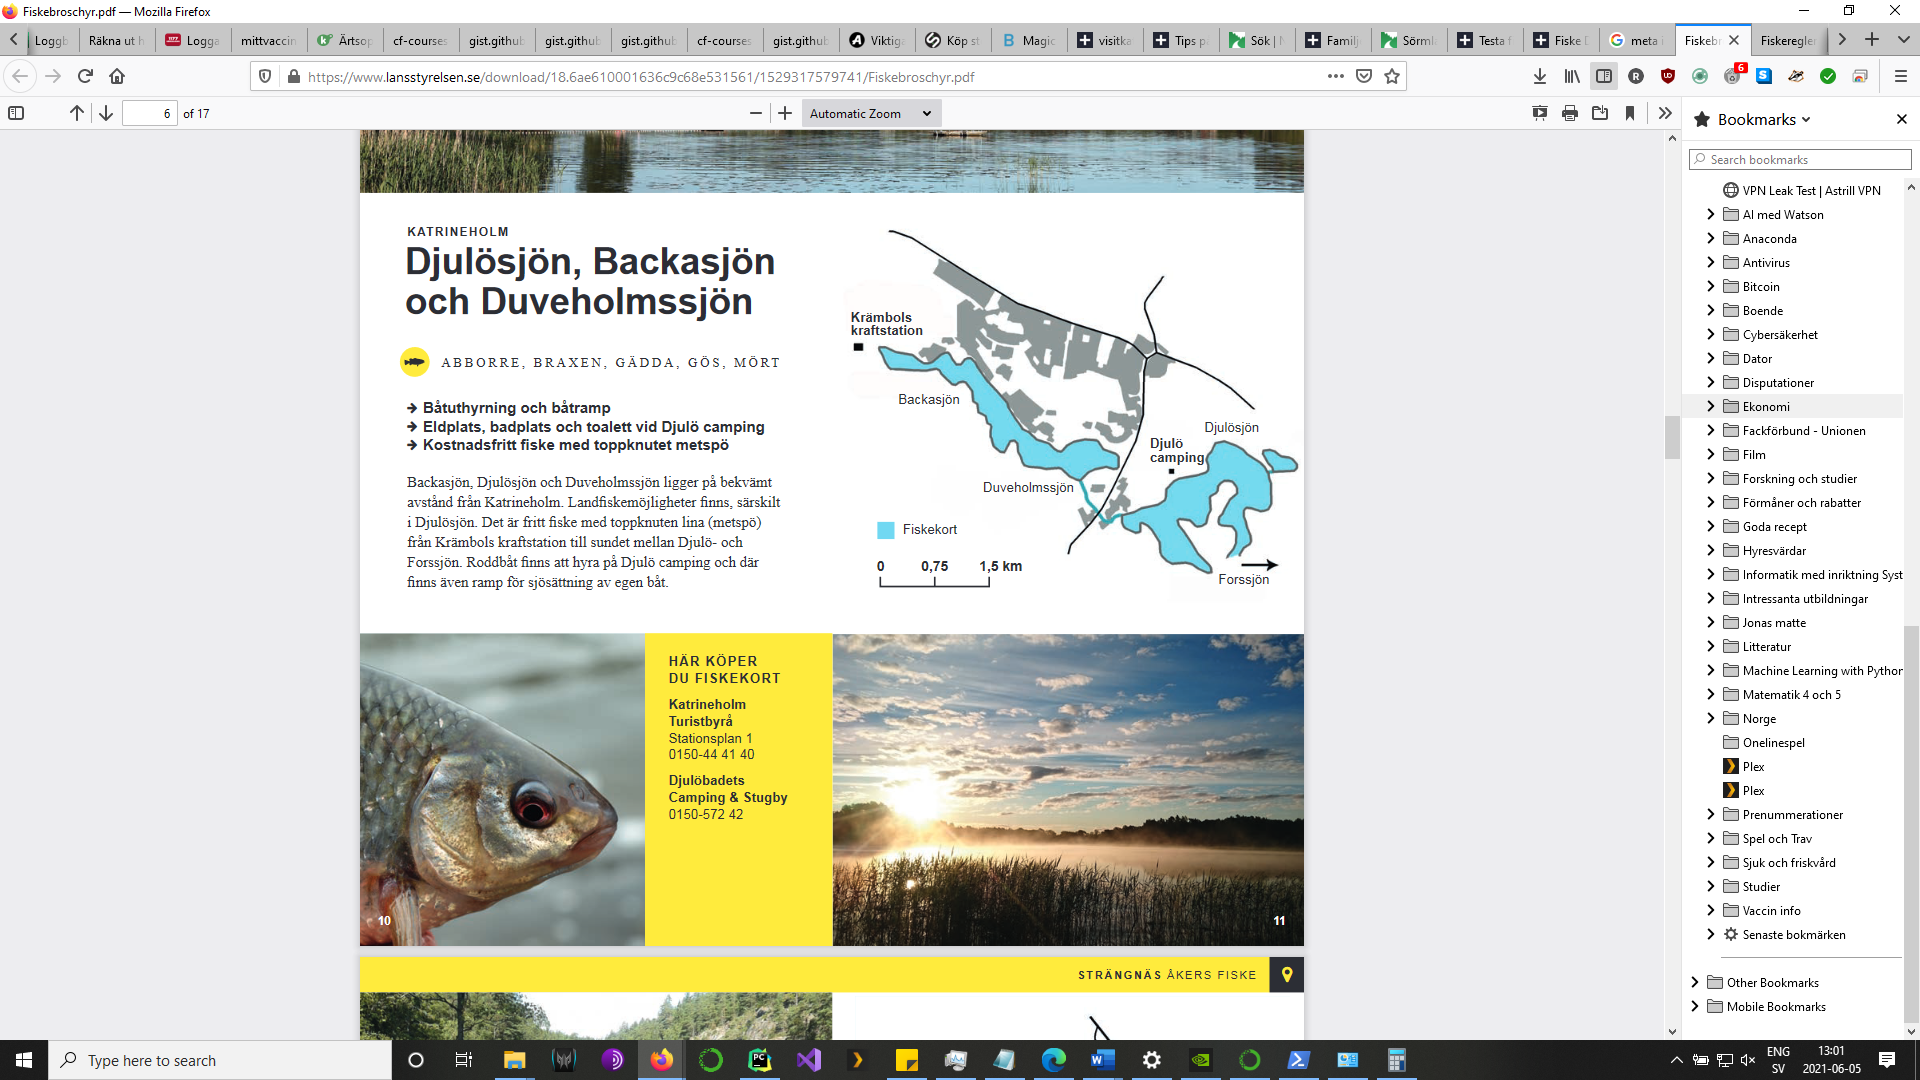)))
* T4
* V100


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e6bf85f4-ae9d-9ff8-f78a-b873b69e25cf)


In [2]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py



--2024-02-05 17:15:57--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-02-05 17:15:57 (139 MB/s) - ‘helper.py’ saved [13380/13380]



In [3]:
# Import series of helper functions
from helper import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow datasets to download data

If you want to get an overwiev of TensorFlow Datasets (TFDS), read the [guide](https://www.tensorflow.org/datasets/overview)

In [4]:
# Get TensorFllow Datasets
import tensorflow_datasets as tfds
datasets_list = tfds.list_builders() # Get all available datasets in TFDS
print('food101' in datasets_list)

True


In [5]:
# Load in the food101 (takes 5-6 minutes)
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                                    shuffle_files=True,
                                                    as_supervised=True, # Data gets returned in tuple format (data, label)
                                                    with_info=True) # Downloads the metadata aswell (ds_info makes it possible)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9R8EWL/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9R8EWL/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our inut data
* What the labels look like (e.g are they one-hot encoded or are they label encoded)
* Do the labels match p with the class names?

In [6]:
# Fetures of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [7]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [8]:
# Take one sample of the training data
train_one_sample = train_data.take(1) # Samples are in format (image_tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [9]:
# Output info about our trainig sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from food101 (tensor form): 56
  Class name (str form): huevos_rancheros
  


In [10]:
# What does our image tensor from TFDS's Food101 loo like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [11]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow datasets

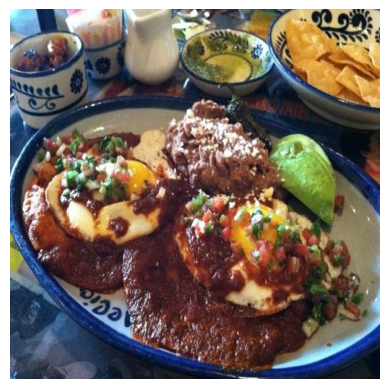

In [12]:
# Plot an image tensor
import matplotlib.pyplot as plt
# Convert the TensorFlow image tensor to NumPy array
image_np = image.numpy()
# Display the image using Matplotlib
plt.imshow(image_np)
plt.axis('off') # Optional: Turn off axis labels
plt.show()

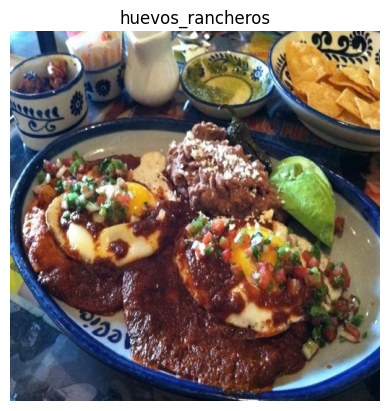

In [13]:
plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is assosciated with the right image
plt.axis(False);

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better

With thes points in mind, we've got a few things we can tackle with a preprocessing function.

In [14]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224): # Since its a tuple we need image, label
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) #reshape target image
  #image = image /255.0 # Rescale image to the range [0, 1] Dont need to do this when using REsNet as it does for you
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple


In [15]:
# Preprocess a single sampple image and check the outputs
preprocessed_img = preprocess_img(image, label)[0] # [0] for the 0th index of the tuple we're returning
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[230.65816 253.64285 251.     ]
  [222.99998 254.97449 252.19388]
  [207.06633 255.      250.36734]
  ...
  [140.66287 129.52519 121.22428]
  [121.14268 115.26515 116.95397]
  [ 83.95363  83.08119  89.63737]]

 [[221.47449 254.37755 253.33163]
  [214.5102  255.      253.92348]
  [198.41327 254.58673 251.96939]
  ...
  [208.66318 195.82143 173.40823]
  [197.03056 190.1071  174.83162]
  [175.54036 171.6169  161.21384]]]...,
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>


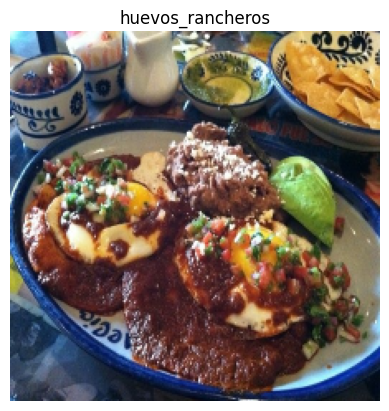

In [16]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

## Batch & prepare datasets

We're now going to make our data input pipeline run really fast.

More [resources](https://www.tensorflow.org/guide/data_performance) on this.

![2024-01-31 (1).png](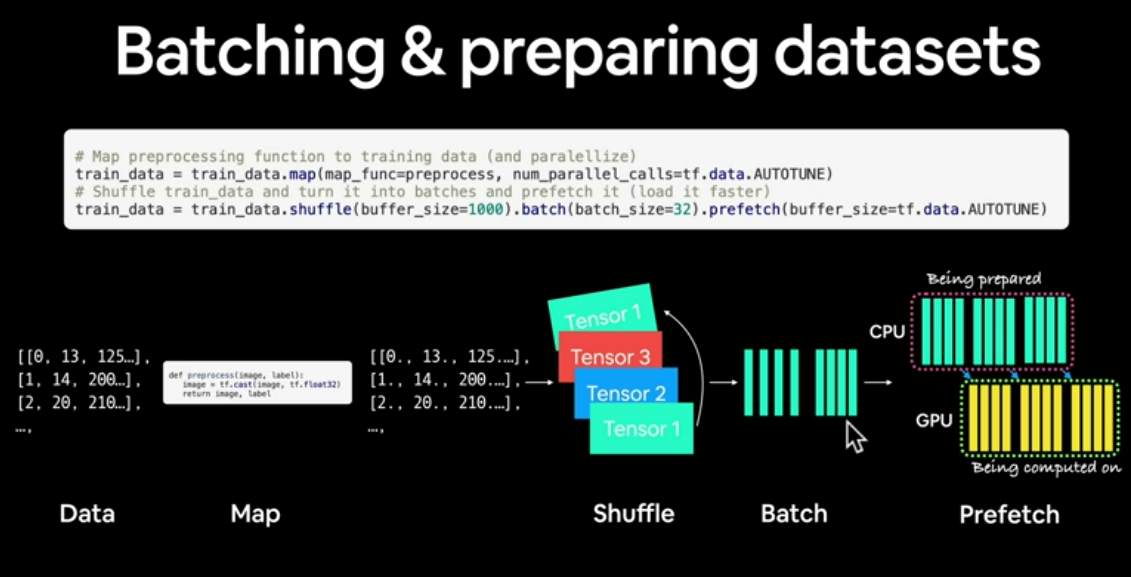![2024-02-03 (3).png](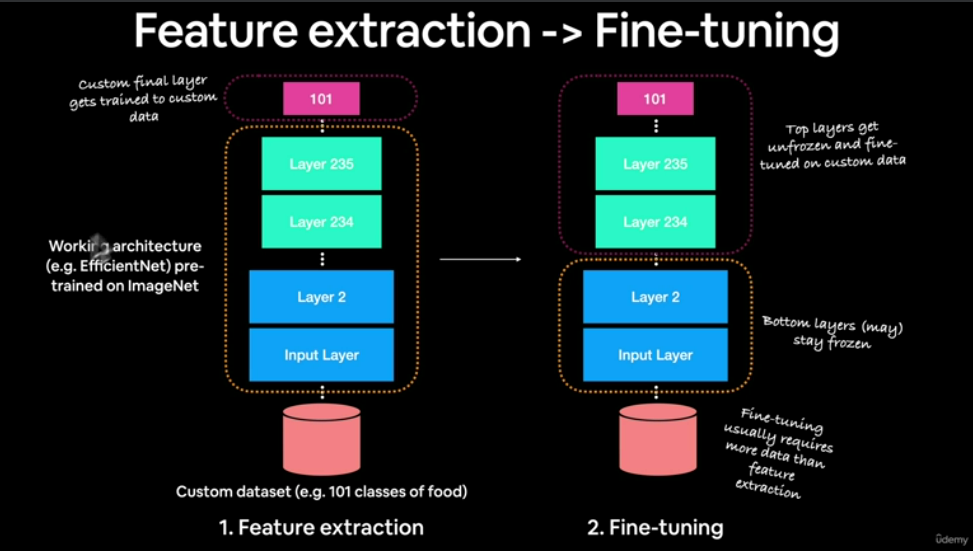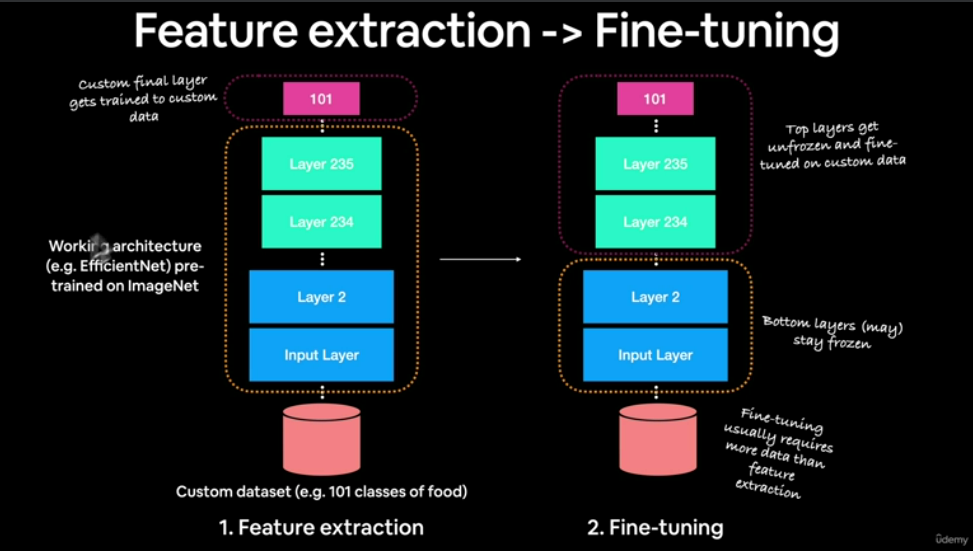))

In [17]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE) # Autotune uses two chips, faster
# Shuffle train data and turn into batches and prefetch it (load faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) # Shuffle is how many elements to shuffle at a single time (1000 if memory not enough)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)# .batch(32).prefetch(tf.data.AUTOTUNE).cache()
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [18]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a coupe of callbacks to help us while our model trains:
* `TensorBoard` callbacks to log training results (so we can visualize them later if need be)
* `ModelCheckpoint` callback to save our model's progress after feature extraction

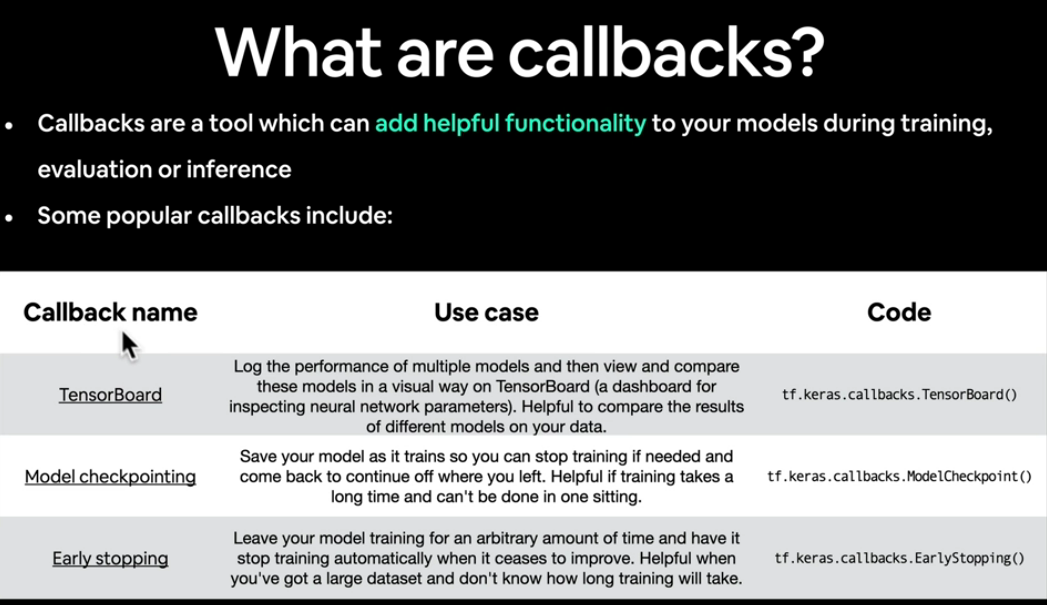

In [19]:
# Create tensorbord callback (import from helper.py)
from helper import create_tensorboard_callback

# Create a ModelCheckpoit callback to save a model's progress during training
checkpoint_path = "model_checkpoints/checkPoint.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation acc
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # Outputs information, 0=none, 1=little info, 2=most info

## Setup mixed precision training

For deeper undestanding, [TensorFlow Guide](https://www.tensorflow.org/guide/mixed_precision)

Mixed precision utilizes a combination of `float32` and `float16` data types to speed up model performance.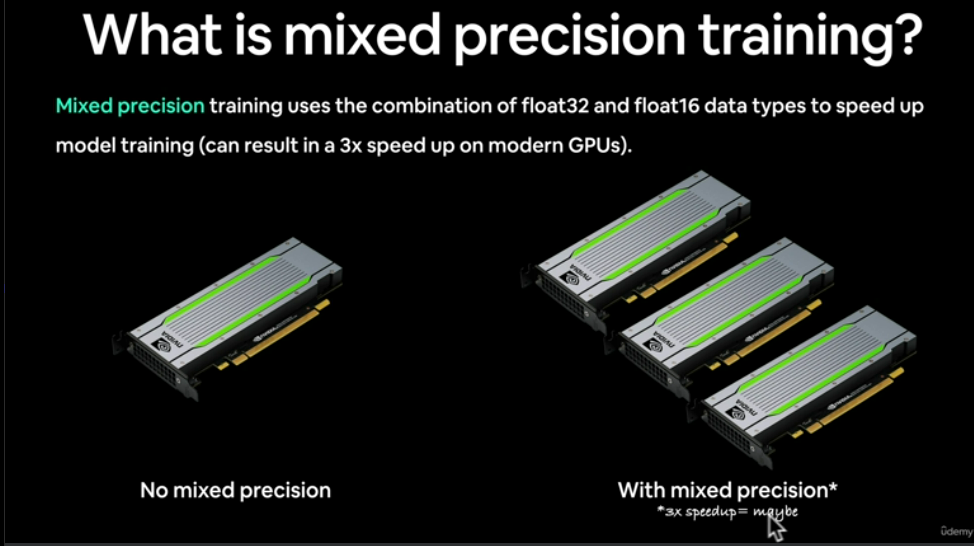

In [20]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy='mixed_float16') # Set global data polict to mixed percision
mixed_precision

<module 'keras.api._v2.keras.mixed_precision' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/mixed_precision/__init__.py'>

In [21]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e6bf85f4-ae9d-9ff8-f78a-b873b69e25cf)


## Build feature extraction model

In [30]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False) # Downloads the pretrained weights
base_model.trainable = False # Froze the layers

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficienetNetBX models have rescaling built-in if your model doesn't you can have a layer like below
# x = preprocessing.rescaling(1./255)(x)
x = base_model(inputs, training=False) # Makes sure layers wich should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use spares_categorical_crossentropy when labels
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [31]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

## Checking layer dtype policies (are we using mixed precision?)

In [32]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.dtype, layer.trainable, layer.dtype_policy)

input_layer float32 True <Policy "float32">
efficientnetb0 float32 False <Policy "mixed_float16">
pooling_layer float32 True <Policy "mixed_float16">
dense_2 float32 True <Policy "mixed_float16">
softmax_float32 float32 True <Policy "float32">


Going through the above we see:
* `layer.name`: the human readable name of particular layer
* `layer.trainable`: is the layer trainable or not? (If `False`, the weights are frozen)
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with

In [33]:
# Check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers: # Check the layers of the base model (layer at index 1 of `model`)
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_3 False float32 <Policy "float32">
rescaling_4 False float32 <Policy "mixed_float16">
normalization_2 False float32 <Policy "mixed_float16">
rescaling_5 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

In [34]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Fit the feature extraction model

If pur goal is to fine-tune a pretrained model, the general order of doing things is:
1. Build a feature extraction model (train a couple output layers with base layer frozen)
2. Fine-tune som of the frozen layers

In [35]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetB7_101_classes_all_data_feature_extract"),
                                                                                            model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetB7_101_classes_all_data_feature_extract/20240205-181522
Epoch 1/3
2368/2368 [==============================] - 105s 41ms/step - loss: 1.7135 - accuracy: 0.5830 - val_loss: 1.1224 - val_accuracy: 0.6944
Epoch 2/3
2368/2368 [==============================] - 97s 41ms/step - loss: 1.1990 - accuracy: 0.6892 - val_loss: 1.0412 - val_accuracy: 0.7156
Epoch 3/3
2368/2368 [==============================] - 97s 41ms/step - loss: 1.0531 - accuracy: 0.7240 - val_loss: 1.0000 - val_accuracy: 0.7270


In [36]:
result_feature_extract_model = model.evaluate(test_data)
result_feature_extract_model

790/790 [==============================] - 27s 35ms/step - loss: 0.9986 - accuracy: 0.7284


[0.9985796809196472, 0.7283960580825806]



And since we used the ModelCheckpoint callback, we've got a saved version of our model in the model_checkpoints directory.

Let's load it in and make sure it performs just as well.
Load and evaluate checkpoint weights

We can load in and evaluate our model's checkpoints by:

* Recreating a new instance of our model called created_model by turning our original model creation code into a function called `create_model()`.
* Compiling our `created_model` with the same loss, optimizer and metrics as the original model (every time you create a new model, you must compile it).
* Calling the `load_weights()` method on our `created_model` and passing it the path to where our checkpointed weights are stored.
* Calling `evaluate()` on `created_model` with loaded weights and saving the results.
* Comparing the `created_model` results to our previous model results (these should be the exact same, if not very close).

A reminder, checkpoints are helpful for when you perform an experiment such as fine-tuning your model. In the case you fine-tune your feature extraction model and find it doesn't offer any improvements, you can always revert back to the checkpointed version of your model.

In [37]:
# 1. Create a function to recreate the original model
def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
  # x = layers.Rescaling(1./255)(x)
  x = base_model(inputs, training=False) # set base_model to inference mode only
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = layers.Dense(len(class_names))(x) # want one output neuron per class
  # Separate activation of output layer so we can output float32 activations
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model

# 2. Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

790/790 [==============================] - 30s 35ms/step - loss: 0.9986 - accuracy: 0.7284


In [40]:
# Check the layers in the base model and see what dtype policy they're using
for layer in created_model.layers[1].layers[:20]: # check only the first 20 layers to save printing space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_4 False float32 <Policy "float32">
rescaling_6 False float32 <Policy "mixed_float16">
normalization_3 False float32 <Policy "mixed_float16">
rescaling_7 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

##Save the whole model to file

We can also save the whole model using the save() method.

Since our model is quite large, you might want to save it to Google Drive (if you're using Google Colab) so you can load it in for use later.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [51]:
## Saving model to Google Drive (optional)

# Imports
import os

# Create save path to drive
save_dir = "drive/MyDrive/Tensorflow/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model.save(save_dir)

FileExistsError: [Errno 17] File exists: 'drive/MyDrive/Tensorflow/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/'

And again, we can check whether or not our model saved correctly by loading it in and evaluating it.

In [52]:
# Load model previously saved above
loaded_saved_model = tf.keras.models.load_model(save_dir)

Loading a `SavedModel` also retains all of the underlying layers `dtype_policy` (we want them to be "mixed_float16").

In [53]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:20]: # check only the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_3 True float32 <Policy "float32">
rescaling_4 False float32 <Policy "mixed_float16">
normalization_2 False float32 <Policy "mixed_float16">
rescaling_5 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float3

In [46]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

790/790 [==============================] - 31s 37ms/step - loss: 0.9986 - accuracy: 0.7284


[0.9985800385475159, 0.7283960580825806]

In [48]:
# The loaded model's results should equal (or at least be very close) to the model's results prior to saving
# Note: this will only work if you've instatiated results variables
import numpy as np
assert np.isclose(result_feature_extract_model, results_loaded_saved_model).all()

In [54]:
# Get a summary of our downloaded model
loaded_saved_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

When we first created our model, we froze all of the layers in the base model by setting `base_model.trainable=False` but since we've loaded in our model from file, let's check whether or not the layers are trainable or not.

In [55]:
# Are any of the layers in our model frozen?
for layer in loaded_saved_model.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense_2 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


To inspect our base model layer, we can access the layers attribute of the layer at index 1 in our model.

In [57]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_3 True float32 <Policy "float32">
rescaling_4 True float32 <Policy "mixed_float16">
normalization_2 True float32 <Policy "mixed_float16">
rescaling_5 True float32 <Policy "mixed_float16">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_f

In [58]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

To make sure the learning rate doesn't get too low (and potentially result in our model learning nothing), we'll set the minimum learning rate to 1e-7.

In [59]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [61]:
# Compile the model
loaded_saved_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

Now let's fit it on all of the data.

We'll set it up to run for up to 100 epochs.

Since we're going to be using the EarlyStopping callback, it might stop before reaching 100 epochs.

In [62]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune = loaded_saved_model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no impro

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20240205-190231
Epoch 1/100
2368/2368 [==============================] - 390s 145ms/step - loss: 0.8699 - accuracy: 0.7655 - val_loss: 0.8007 - val_accuracy: 0.7781 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 339s 143ms/step - loss: 0.5352 - accuracy: 0.8519 - val_loss: 0.7566 - val_accuracy: 0.7948 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 308s 130ms/step - loss: 0.2985 - accuracy: 0.9152 - val_loss: 0.8521 - val_accuracy: 0.7855 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1603 - accuracy: 0.9522
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 307s 129ms/step - loss: 0.1603 - accuracy: 0.9522 - val_loss: 0.9370 - val_accuracy: 0.7865 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 307s 12

In [64]:
# Save model to Google Drive (optional)
loaded_saved_model.save("/content/drive/MyDrive/Tensorflow/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/")

In [67]:
results_unfreezed_saved_model = loaded_saved_model.evaluate(test_data)
results_unfreezed_saved_model

790/790 [==============================] - 29s 36ms/step - loss: 1.0087 - accuracy: 0.8039


[1.0087411403656006, 0.8039208054542542]

## Preparing our model's layers for fine-tuning

Our feature-extraction model is showing some great promise after three epochs. But since we've got so much data, it's probably worthwhile that we see what results we can get with fine-tuning (fine-tuning usually works best when you've got quite a large amount of data).

Remember our goal of beating the DeepFood paper?

They were able to achieve 77.4% top-1 accuracy on Food101 over 2-3 days of training.

Do you think fine-tuning will get us there?

Let's find out.

To start, let's load in our saved model.

  🔑 Note: It's worth remembering a traditional workflow for fine-tuning is to freeze a pre-trained base model and then train only the output layers for a few iterations so their weights can be updated inline with your custom data (feature extraction). And then unfreeze a number or all of the layers in the base model and continue training until the model stops improving.


If you really wanted to step things up, you could try using the EfficientNetB4 model (a larger version of EfficientNetB0). At at the time of writing, the EfficientNet family has the state of the art classification results on the Food101 dataset.

   📖 Resource: To see which models are currently performing the best on a given dataset or problem type as well as the latest trending machine learning research, be sure to check out paperswithcode.com and sotabench.com.


In future experiments, we might try things like:

* A different iteration of EfficientNet (e.g. EfficientNetB4 instead of EfficientNetB0).
* Unfreezing less layers of the base model and training them rather than unfreezing the whole base model in one go.


## View training results on TensorBoard

Since we tracked our model's fine-tuning training logs using the TensorBoard callback, let's upload them and inspect them on TensorBoard.dev

In [68]:
# Upload experiment results to TensorBoard
!tensorboard dev upload --logdir ./training_logs \
   --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
   --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
   --one_shot

2024-02-05 19:43:54.189550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 19:43:54.189606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 19:43:54.191139: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 19:43:55.196372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

In [69]:
# View past TensorBoard experiments
!tensorboard dev list

2024-02-05 19:46:11.745507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 19:46:11.745565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 19:46:11.746822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 19:46:12.741793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard.dev Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to

In [ ]:
# Delete past TensorBoard experiments
# !tensorboard dev delete --experiment_id YOUR_EXPERIMENT_ID

# Example
# !tensorboard dev delete --experiment_id OAE6KXizQZKQxDiqI3cnUQ

In [29]:
#219 3:34